In [1]:
import os
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from fastai.vision.all import *

In [2]:
# Define the path to image data
image_data_path = Path('/home/tyler/git/207_hw/final_project/dataset')
# Create a DataFrame from directories with labels as the directory names
image_files = get_image_files(image_data_path)
labels = [f.parent.name for f in image_files]
df = pd.DataFrame({'fname': image_files, 'labels': labels})

In [3]:
# Add a column for whether the data should be in the validation set
np.random.seed(42)  # For reproducible splits
df['is_valid'] = np.random.rand(len(df)) < 0.2  # 20% data as validation set

In [4]:
# View the first few rows of the dataframe
print(df.head())

                                                                                                             fname  \
0  /home/tyler/git/207_hw/final_project/dataset/Happy/0b251856330e34b0a211168bb153b36aeffca574286a931701ec43fc.JPG   
1  /home/tyler/git/207_hw/final_project/dataset/Happy/1a8589ef3244697e403d0b3edd5fa604a8537f1fb8fd361fb96af202.jpg   
2  /home/tyler/git/207_hw/final_project/dataset/Happy/0a69ad109c0727381824aa6a69960fa97f30de64dc273404f0bc0bd6.jpg   
3  /home/tyler/git/207_hw/final_project/dataset/Happy/0c95bc3b1a39fe9d139e42cf4409e2bcbace329db5d65a1cd48d08b3.jpg   
4  /home/tyler/git/207_hw/final_project/dataset/Happy/0ad90657662303e89eb99cee2e8470d73cb7a883695da100721c2f60.jpg   

  labels  is_valid  
0  Happy     False  
1  Happy     False  
2  Happy     False  
3  Happy     False  
4  Happy      True  


In [5]:
def get_x(r): return r['fname']
def get_y(r): return r['labels'].split()

In [6]:
block = DataBlock(
    blocks=(ImageBlock, MultiCategoryBlock),
    splitter=ColSplitter('is_valid'),
    get_x=get_x,
    get_y=get_y,
    item_tfms=Resize(460),
    batch_tfms=aug_transforms(size=224)
)

# Pass the DataFrame to create DataLoaders
dls = block.dataloaders(df, bs=64)

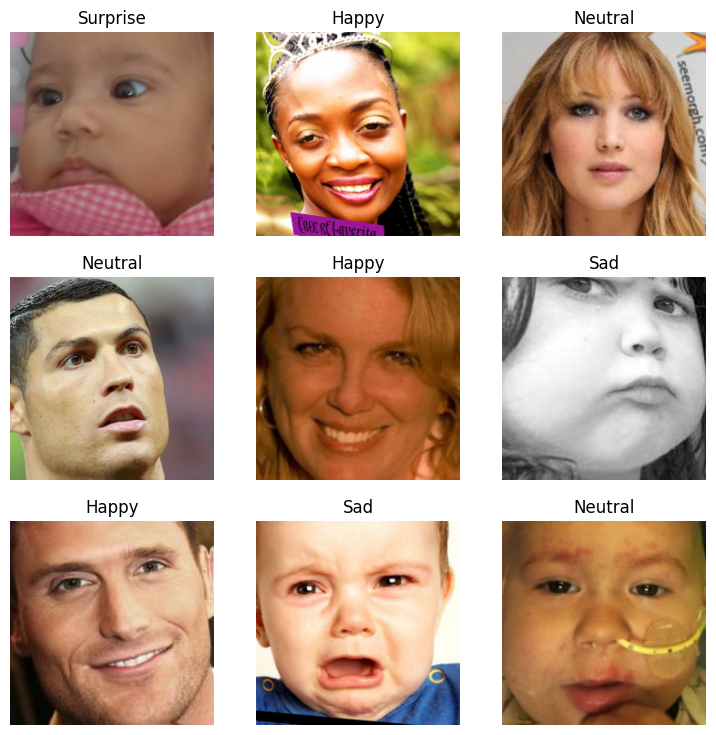

In [7]:
# Show a batch to verify everything is loaded correctly
dls.show_batch(max_n=9)

In [11]:
learn = vision_learner(dls, resnet34, metrics=partial(accuracy_multi, thresh=0.5))
learn.fine_tune(4,6e-5)

epoch,train_loss,valid_loss,accuracy_multi,time


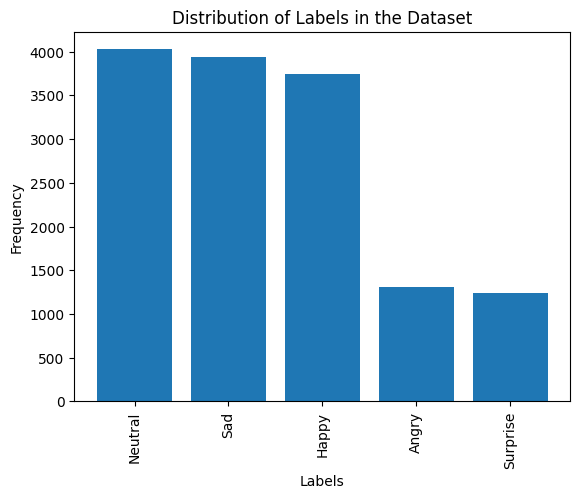

In [9]:
# Plot label distribution using Matplotlib
label_counts = df['labels'].str.split().explode().value_counts()
plt.bar(label_counts.index, label_counts)
plt.xticks(rotation=90)
plt.xlabel('Labels')
plt.ylabel('Frequency')
plt.title('Distribution of Labels in the Dataset')
plt.show()

/home/tyler/git/207_hw/.venv/lib/python3.11/site-packages/fastai/learner.py:51: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(file, map_location=device, *

SuggestedLRs(valley=6.30957365501672e-05)

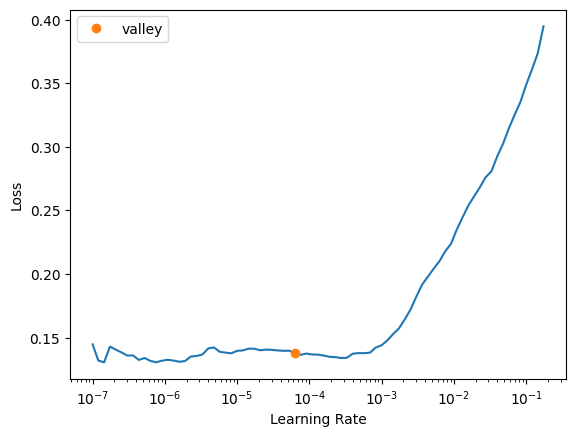

In [10]:
learn.lr_find()